## CMSC641  Project 3 

### Mahdi Navari

## Part 1: Review Classification
This part uses the Amazon Fine Foods reviews dataset, that contains reviews for a collection of products from Amazon. You can find the full dataset at: https://snap.stanford.edu/data/web-FineFoods.html. The project directory contains a small portion of it (not a random sample) with 2000 reviews. The format of the file should be self-explanatory.

Your task is to read in this file, and construct a simple classifier to predict the review/score from the review/userId, review/profileName, review/time, review/summary, and review/text (but not the productId, or helpfulness). You should figure out different types of features to use for this task, and should use a Naive Bayes Classifier for the classification (you can use other methods if you'd like). You should use off-the-shelf implementation -- here is the sci-kit one: http://scikit-learn.org/stable/modules/naive_bayes.html

(Optional) As an optional task, try to predict the review/helpfulness from the rest of the information (including the review/score). Note that, modeling time would be crucial here, since later reviews are less likely to be voted as helpful or unhelpful.


In [2]:
import re 
import string
import numpy as np
import pandas as pd
import scipy.sparse as sparse
import matplotlib.pyplot as plt
#nltk.download()

INPUT_FILE_NAME = "finefoods_training.txt"
OUTPUT_FILE_NAME = "Output.csv"

header = [
    "product/productId",
    "review/userId",
    "review/profileName",
    "review/helpfulness",
    "review/score",
    "review/time",
    "review/summary",
    "review/text"]

f = open(INPUT_FILE_NAME)
outfile = open(OUTPUT_FILE_NAME,"w")

# Write header
outfile.write(",".join(header) + "\n")

currentLine = []
for line in f:
   line = line.strip()

   if line == "": 
      outfile.write(",".join(currentLine))
      outfile.write("\n")
      currentLine = []
      continue
   parts = line.split(":",1)
   #tmp = parts[1]
   #print (tmp) 
   parts[1] = parts[1].replace(',', ' ')
   #parts[1] = re.sub(r'[^\w\s]','',parts[1])
   #parts[1] = parts[1].lower()
   currentLine.append(parts[1])

if currentLine != []:
    outfile.write(",".join(currentLine))


f.close()
outfile.close()

In [4]:
df = pd.read_csv('Output.csv', encoding='latin-1')
df

,product/productId,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1/1,5.0,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned ...
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0/0,1.0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanu...
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1/1,4.0,1219017600,"""Delight"" says it all",This is a confection that has been around a f...
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3/3,2.0,1307923200,Cough Medicine,If you are looking for the secret ingredient ...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0/0,5.0,1350777600,Great taffy,Great taffy at a great price. There was a wi...
5,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0/0,4.0,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this ...
6,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0/0,5.0,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and wa...
7,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0/0,5.0,1336003200,Wonderful tasty taffy,This taffy is so good. It is very soft and c...
8,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1/1,5.0,1322006400,Yay Barley,Right now I'm mostly just sprouting this so m...
9,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0/0,5.0,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for the...


### Data cleaning 

In [5]:
import nltk
import string
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split

#STOP_WORDS = set(stopwords.words('english'))
#STOP_WORDS.add('')
cleanup_re = re.compile('[^a-z]+')
def cleanup(sentence):
    sentence = sentence.lower()
    sentence = cleanup_re.sub(' ', sentence).strip()
    sentence = " ".join(nltk.word_tokenize(sentence))
    # sentence = [word for word in sentence if word not in stopwords.words('english')] does not work 
    return sentence

df["review_clean"] = df["review/text"].apply(cleanup)
df

,product/productId,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text,review_clean
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1/1,5.0,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned ...,i have bought several of the vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0/0,1.0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanu...,product arrived labeled as jumbo salted peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1/1,4.0,1219017600,"""Delight"" says it all",This is a confection that has been around a f...,this is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3/3,2.0,1307923200,Cough Medicine,If you are looking for the secret ingredient ...,if you are looking for the secret ingredient i...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0/0,5.0,1350777600,Great taffy,Great taffy at a great price. There was a wi...,great taffy at a great price there was a wide ...
5,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0/0,4.0,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this ...,i got a wild hair for taffy and ordered this f...
6,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0/0,5.0,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and wa...,this saltwater taffy had great flavors and was...
7,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0/0,5.0,1336003200,Wonderful tasty taffy,This taffy is so good. It is very soft and c...,this taffy is so good it is very soft and chew...
8,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1/1,5.0,1322006400,Yay Barley,Right now I'm mostly just sprouting this so m...,right now i m mostly just sprouting this so my...
9,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0/0,5.0,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for the...,this is a very healthy dog food good for their...


#### Convert scores to positive or negative 
Plot  positive and negative score

Look at the following link for more info https://gist.github.com/abhigrover101/dff3ebd06a0c30c7155f

Score
neg     443
pos    1557
Name: review/summary, dtype: int64
Percentage of negative reviews 22.15 %
Percentage of positive reviews 77.85 %


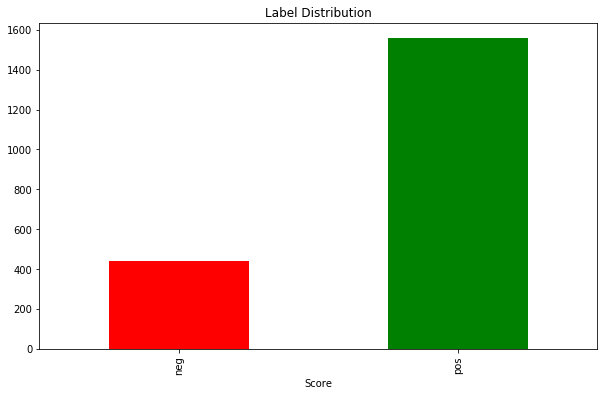

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline  
df['Score'] = df['review/score'].apply(lambda x : 'pos' if x > 3 else 'neg')
print (df.groupby('Score')['review/summary'].count())
df.groupby('Score')['review/summary'].count().plot(kind='bar',color=['r','g'],title='Label Distribution',figsize=(10,6))
print ('Percentage of negative reviews %.2f %%' % ((df.groupby('Score')['review/summary'].count()['neg'])*100.0/len(df)))
print ('Percentage of positive reviews %.2f %%' % ((df.groupby('Score')['review/summary'].count()['pos'])*100.0/len(df)))

### Test set creation
- Create a test set of 20% records
- Use stratified sampling on the Score variable to make sure class proportions are the same for train and test sets


In [7]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1234)
for train_index, test_index in split.split(df, df['Score']):
    train_set = df.iloc[train_index]
    test_set = df.iloc[test_index]

Check class proportions on train and test sets to make sure properly stratified

In [8]:
print("Train set:")
print(train_set['Score'].value_counts() / len(train_set))

print("Test set:")
print(test_set['Score'].value_counts() / len(test_set))

Train set:
pos    0.77875
neg    0.22125
Name: Score, dtype: float64
Test set:
pos    0.7775
neg    0.2225
Name: Score, dtype: float64


Following the example from http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

#### Bags of words

The most intuitive way to do so is the bags of words representation

#### Tokenizing text with scikit-learn

Text preprocessing, tokenizing and filtering of stopwords are included in a high level component that is able to build a dictionary of features and transform documents to feature vectors

In [9]:
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
#count_vect = CountVectorizer(min_df = 1, ngram_range = (1, 4))
X_train_counts = count_vect.fit_transform(train_set["review_clean"])

#### occurrences to frequencies
##### Occurrences issue: 
Longer documents will have higher average count values than shorter documents
##### Solution: Term Frequencies (tf)
Divide the number of occurrences of each word in a document by the total number of words in the document
##### Document Frequency issue: 
Words that occur in many documents in the corpus are less informative    
##### Solution:  Inverse Document Frequency (idf)

In [10]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print (X_train_tfidf.shape)
y_train = train_set["Score"]
print (y_train.shape)

(1600, 7326)
(1600,)


### Train a naïve Bayes classifier useing  df[text/review] 

In [11]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, y_train)

#### Test the model 
Extract the features using almost the same feature extracting chain as before. The difference is that we call transform instead of fit_transform on the transformers, since they have already been fit to the training set

In [12]:
X_new_counts = count_vect.transform(test_set["review_clean"])
X_test_tfidf = tfidf_transformer.transform(X_new_counts)
print (X_test_tfidf.shape)

y_test = test_set["Score"]
print (y_test.shape)

(400, 7326)
(400,)


In [13]:
predicted = clf.predict(X_test_tfidf)
predicted[1:50]

array(['pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos',
       'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos',
       'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos',
       'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos',
       'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos',
       'pos', 'pos', 'pos', 'pos'],
      dtype='<U3')

In [14]:
np.mean(predicted == y_test) 

0.77749999999999997

### Train the model using df[summary/review]

In [15]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train_set["review/summary"])

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print (X_train_tfidf.shape)

y_train = train_set["Score"]
print (y_train.shape)

(1600, 1551)
(1600,)


In [16]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [17]:
X_new_counts = count_vect.transform(test_set["review/summary"])
X_test_tfidf = tfidf_transformer.transform(X_new_counts)
print (X_test_tfidf.shape)

y_test = test_set["Score"]
print (y_test.shape)

(400, 1551)
(400,)


In [18]:
predicted = clf.predict(X_test_tfidf)
predicted[1:50] 

array(['pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos',
       'pos', 'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos',
       'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos',
       'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos', 'pos',
       'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos',
       'pos', 'pos', 'pos', 'pos'],
      dtype='<U3')

In [19]:
np.mean(predicted == test_set["Score"]) 

0.82250000000000001

### Building a pipeline

In [20]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB())])

#### Train the model (pipeline) using summary review 

In [21]:
text_clf.fit(train_set["review/summary"], train_set["Score"])  
#Pipeline(...)
predicted = text_clf.predict(test_set["review/summary"])
np.mean(predicted == test_set["Score"]) 

0.82250000000000001

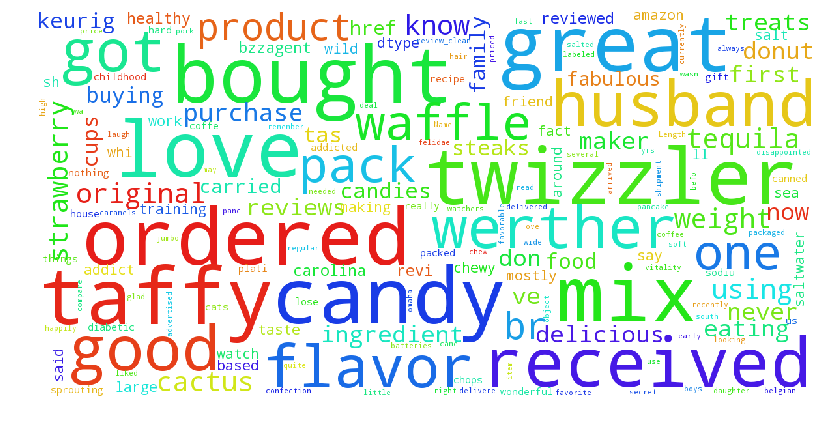

In [22]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(14, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(df["review_clean"])


## Part 2 : Named Entity Recognition
Here, we will use the Named Entity Recognition functionality of NLTK to extract entities and relationships from some recent news articles. Specifically, pick your favorite viewer sport (football, soccer, tennis, baseball, cricket, etc.), and download 10 recent news articles describing some games/matches (e.g., http://www.npr.org/sections/thetwo-way/2017/11/01/561445201/it-s-winner-take-all-in-game-7-of-the-world-series).

2.1. Use NLTK to write code to extract named entities from each of them. The final output should simply be a list of entities and their types, which would require understanding the structure of the output of the ne_chunk command, and traversing it to find just the named entities.

2.2 Next, write a few regular expressions to extract information about which positions or roles different players serve in their team. For example, from the above link, the sentence The Dodgers put their leadoff hitter, Forsythe, on base with a single. tells us that: Forsythe is the leadoff hitter for Dodgers. The regular expression that you write here will be specific to the sport that you have picked.

#### 2.1  extract named entities from each article
Articles are saves in the text files.

categories mean:

geo = Geographical Entity
org = Organization
per = Person
gpe = Geopolitical Entity
tim = Time indicator
art = Artifact
eve = Event
nat = Natural Phenomenon

In [23]:
import nltk
with open('./NewsArticle/news1.txt', 'r') as f:
    news_text = f.read()
entity_names = []
for sent in nltk.sent_tokenize(news_text):
    for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
        tmp = []
        if hasattr(chunk, 'label'):
            tmp = [chunk.label(),' '.join([child[0] for child in chunk])]
            entity_names.append(tmp)
            #print(chunk.label(), ' '.join(c[0] for c in chunk))
print (entity_names)

[['PERSON', 'Houston'], ['PERSON', 'Astros Defeat Los Angeles Dodgers'], ['PERSON', 'Richard Gonzales'], ['ORGANIZATION', 'RICHARD'], ['PERSON', 'Cameron Maybin'], ['PERSON', 'George Springer'], ['ORGANIZATION', 'Houston Astros'], ['PERSON', 'Harry'], ['PERSON', 'Images'], ['ORGANIZATION', 'Houston Astros'], ['GPE', 'Los Angeles'], ['ORGANIZATION', 'Astros'], ['ORGANIZATION', 'Dodgers'], ['PERSON', 'Astros'], ['PERSON', 'Charlie Morton'], ['ORGANIZATION', 'Dodgers'], ['ORGANIZATION', 'Dodgers'], ['PERSON', 'George'], ['PERSON', 'Springer'], ['ORGANIZATION', 'Houston Astros'], ['PERSON', 'Ezra'], ['ORGANIZATION', 'Astros'], ['PERSON', 'George Springer'], ['PERSON', 'Alex Bregman'], ['ORGANIZATION', 'Dodgers'], ['PERSON', 'Cody Bellinger'], ['PERSON', 'Bregman'], ['PERSON', 'Jose Altuve'], ['ORGANIZATION', 'RBI'], ['ORGANIZATION', 'Dodgers'], ['PERSON', 'Chris Taylor'], ['PERSON', 'Justin Turner'], ['GPE', 'Astros'], ['PERSON', 'Lance McCullers'], ['ORGANIZATION', 'McCullers'], ['PERSON'

#### Loop over text files in the NewsArticle directory and extract named entities from each article

In [24]:
import os
directory = './NewsArticle'
for filename in os.listdir(directory):
    if filename.endswith(".txt"): 
        print(os.path.join(directory, filename))        
        with open('./NewsArticle/news1.txt', 'r') as f:
            my_sent = f.read()    
        parse_tree = nltk.ne_chunk(nltk.tag.pos_tag(my_sent.split()), binary=True)  
        named_entities = []
        for t in parse_tree.subtrees():       
            named_entities.append(list(t))  
        print (named_entities)                      
        continue
    else:
        continue

./NewsArticle\news1.txt
[[Tree('NE', [('Houston', 'NNP'), ('Astros', 'NNP'), ('Defeat', 'NNP'), ('Los', 'NNP'), ('Angeles', 'NNP'), ('Dodgers', 'NNP')]), ('To', 'TO'), ('Take', 'VB'), ('World', 'NNP'), ('Series', 'NNP'), ('Crown', 'NNP'), ('Facebook', 'NNP'), ('Twitter', 'NNP'), ('Email', 'NNP'), ('November', 'NNP'), ('1,', 'CD'), ('20176:38', 'CD'), ('PM', 'NNP'), ('ET', 'NNP'), Tree('NE', [('Richard', 'NNP'), ('Gonzales', 'NNP')]), Tree('NE', [('RICHARD', 'NNP')]), Tree('NE', [('GONZALES', 'NNP'), ('Cameron', 'NNP'), ('Maybin', 'NNP')]), ('and', 'CC'), Tree('NE', [('George', 'NNP'), ('Springer', 'NNP')]), ('of', 'IN'), ('the', 'DT'), Tree('NE', [('Houston', 'NNP'), ('Astros', 'NNP')]), ('celebrate', 'NN'), ('after', 'IN'), ('winning', 'VBG'), ('the', 'DT'), ("team's", 'NN'), ('first', 'RB'), ('World', 'NNP'), ('Series', 'NNP'), ('title.', 'NN'), Tree('NE', [('Harry', 'NNP')]), ('How/Getty', 'NNP'), ('Images', 'NNP'), ('Updated', 'VBD'), ('12:01', 'CD'), ('a.m.', 'RB'), ('ET', 'NNP'),

[[Tree('NE', [('Houston', 'NNP'), ('Astros', 'NNP'), ('Defeat', 'NNP'), ('Los', 'NNP'), ('Angeles', 'NNP'), ('Dodgers', 'NNP')]), ('To', 'TO'), ('Take', 'VB'), ('World', 'NNP'), ('Series', 'NNP'), ('Crown', 'NNP'), ('Facebook', 'NNP'), ('Twitter', 'NNP'), ('Email', 'NNP'), ('November', 'NNP'), ('1,', 'CD'), ('20176:38', 'CD'), ('PM', 'NNP'), ('ET', 'NNP'), Tree('NE', [('Richard', 'NNP'), ('Gonzales', 'NNP')]), Tree('NE', [('RICHARD', 'NNP')]), Tree('NE', [('GONZALES', 'NNP'), ('Cameron', 'NNP'), ('Maybin', 'NNP')]), ('and', 'CC'), Tree('NE', [('George', 'NNP'), ('Springer', 'NNP')]), ('of', 'IN'), ('the', 'DT'), Tree('NE', [('Houston', 'NNP'), ('Astros', 'NNP')]), ('celebrate', 'NN'), ('after', 'IN'), ('winning', 'VBG'), ('the', 'DT'), ("team's", 'NN'), ('first', 'RB'), ('World', 'NNP'), ('Series', 'NNP'), ('title.', 'NN'), Tree('NE', [('Harry', 'NNP')]), ('How/Getty', 'NNP'), ('Images', 'NNP'), ('Updated', 'VBD'), ('12:01', 'CD'), ('a.m.', 'RB'), ('ET', 'NNP'), ('The', 'DT'), Tree('NE

[[Tree('NE', [('Houston', 'NNP'), ('Astros', 'NNP'), ('Defeat', 'NNP'), ('Los', 'NNP'), ('Angeles', 'NNP'), ('Dodgers', 'NNP')]), ('To', 'TO'), ('Take', 'VB'), ('World', 'NNP'), ('Series', 'NNP'), ('Crown', 'NNP'), ('Facebook', 'NNP'), ('Twitter', 'NNP'), ('Email', 'NNP'), ('November', 'NNP'), ('1,', 'CD'), ('20176:38', 'CD'), ('PM', 'NNP'), ('ET', 'NNP'), Tree('NE', [('Richard', 'NNP'), ('Gonzales', 'NNP')]), Tree('NE', [('RICHARD', 'NNP')]), Tree('NE', [('GONZALES', 'NNP'), ('Cameron', 'NNP'), ('Maybin', 'NNP')]), ('and', 'CC'), Tree('NE', [('George', 'NNP'), ('Springer', 'NNP')]), ('of', 'IN'), ('the', 'DT'), Tree('NE', [('Houston', 'NNP'), ('Astros', 'NNP')]), ('celebrate', 'NN'), ('after', 'IN'), ('winning', 'VBG'), ('the', 'DT'), ("team's", 'NN'), ('first', 'RB'), ('World', 'NNP'), ('Series', 'NNP'), ('title.', 'NN'), Tree('NE', [('Harry', 'NNP')]), ('How/Getty', 'NNP'), ('Images', 'NNP'), ('Updated', 'VBD'), ('12:01', 'CD'), ('a.m.', 'RB'), ('ET', 'NNP'), ('The', 'DT'), Tree('NE

[[Tree('NE', [('Houston', 'NNP'), ('Astros', 'NNP'), ('Defeat', 'NNP'), ('Los', 'NNP'), ('Angeles', 'NNP'), ('Dodgers', 'NNP')]), ('To', 'TO'), ('Take', 'VB'), ('World', 'NNP'), ('Series', 'NNP'), ('Crown', 'NNP'), ('Facebook', 'NNP'), ('Twitter', 'NNP'), ('Email', 'NNP'), ('November', 'NNP'), ('1,', 'CD'), ('20176:38', 'CD'), ('PM', 'NNP'), ('ET', 'NNP'), Tree('NE', [('Richard', 'NNP'), ('Gonzales', 'NNP')]), Tree('NE', [('RICHARD', 'NNP')]), Tree('NE', [('GONZALES', 'NNP'), ('Cameron', 'NNP'), ('Maybin', 'NNP')]), ('and', 'CC'), Tree('NE', [('George', 'NNP'), ('Springer', 'NNP')]), ('of', 'IN'), ('the', 'DT'), Tree('NE', [('Houston', 'NNP'), ('Astros', 'NNP')]), ('celebrate', 'NN'), ('after', 'IN'), ('winning', 'VBG'), ('the', 'DT'), ("team's", 'NN'), ('first', 'RB'), ('World', 'NNP'), ('Series', 'NNP'), ('title.', 'NN'), Tree('NE', [('Harry', 'NNP')]), ('How/Getty', 'NNP'), ('Images', 'NNP'), ('Updated', 'VBD'), ('12:01', 'CD'), ('a.m.', 'RB'), ('ET', 'NNP'), ('The', 'DT'), Tree('NE

[[Tree('NE', [('Houston', 'NNP'), ('Astros', 'NNP'), ('Defeat', 'NNP'), ('Los', 'NNP'), ('Angeles', 'NNP'), ('Dodgers', 'NNP')]), ('To', 'TO'), ('Take', 'VB'), ('World', 'NNP'), ('Series', 'NNP'), ('Crown', 'NNP'), ('Facebook', 'NNP'), ('Twitter', 'NNP'), ('Email', 'NNP'), ('November', 'NNP'), ('1,', 'CD'), ('20176:38', 'CD'), ('PM', 'NNP'), ('ET', 'NNP'), Tree('NE', [('Richard', 'NNP'), ('Gonzales', 'NNP')]), Tree('NE', [('RICHARD', 'NNP')]), Tree('NE', [('GONZALES', 'NNP'), ('Cameron', 'NNP'), ('Maybin', 'NNP')]), ('and', 'CC'), Tree('NE', [('George', 'NNP'), ('Springer', 'NNP')]), ('of', 'IN'), ('the', 'DT'), Tree('NE', [('Houston', 'NNP'), ('Astros', 'NNP')]), ('celebrate', 'NN'), ('after', 'IN'), ('winning', 'VBG'), ('the', 'DT'), ("team's", 'NN'), ('first', 'RB'), ('World', 'NNP'), ('Series', 'NNP'), ('title.', 'NN'), Tree('NE', [('Harry', 'NNP')]), ('How/Getty', 'NNP'), ('Images', 'NNP'), ('Updated', 'VBD'), ('12:01', 'CD'), ('a.m.', 'RB'), ('ET', 'NNP'), ('The', 'DT'), Tree('NE

#### 2.2  extract information about which positions or roles different players serve in their team

#### Note that here I have directry read the data from web not text files 

In [25]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests
from requests import get

urls = ['https://www.npr.org/sections/thetwo-way/2017/11/01/561445201/it-s-winner-take-all-in-game-7-of-the-world-seriesL'
       ,'https://www.npr.org/sections/thetwo-way/2017/10/31/561263915/astros-seeking-to-nail-down-world-series-in-game-6'
       ,'https://www.npr.org/sections/thetwo-way/2017/10/24/559886751/2017-world-series-kicks-off-tonight-in-los-angeles'
       ,'https://www.npr.org/sections/thetwo-way/2017/10/24/559886751/2017-world-series-kicks-off-tonight-in-los-angeles'
       ,'https://www.npr.org/sections/thetwo-way/2013/08/23/214818212/vin-scully-says-hell-return-to-dodgers-booth-for-65th-year'
       ,'https://www.npr.org/sections/itsallpolitics/2015/10/23/451235574/l-a-congressman-loses-bet-sings-meet-the-mets'
       ,'https://www.npr.org/sections/thetwo-way/2017/01/18/510508762/bagwell-raines-and-rodriquez-are-elected-to-baseball-s-hall-of-fame'
       ,'https://www.npr.org/sections/thetwo-way/2017/10/22/559322658/astros-advance-to-the-world-series-by-shutting-out-yankees-4-0']

for url in urls:
    print (url)
    response = get(url)

    # Use BeautifulSoup to parse the HTML content
    soup = BeautifulSoup(response.text, 'html.parser')

    article_text = ''
    article = soup.find().findAll('p')
    for element in article:
        article_text += '\n' + ''.join(element.findAll(text = True))
    print (article_text)    

    import nltk
    from nltk import pos_tag, word_tokenize

    name_entity = pos_tag (word_tokenize(article_text))
    type(name_entity)
    print (name_entity)    
    
    
    name_entity_role = []
    word_list = ['fielder','starter','hitter','catcher','pitcher','pinch','baseman','base','center','left','right' , 'Broadcaster']
    for i in range(len(name_entity)):
        tmp = []
        if name_entity[i][0] in word_list:
            tmp = [name_entity[i][0] , name_entity[i+1][0], name_entity[i+2][0], name_entity[i+3][0]]
            name_entity_role.append(tmp)            
    print (name_entity_role)
    

https://www.npr.org/sections/thetwo-way/2017/11/01/561445201/it-s-winner-take-all-in-game-7-of-the-world-seriesL



      Richard Gonzales
    


                Cameron Maybin and George Springer of the Houston Astros celebrate after winning the team's first World Series title.
                
                
                    
                    Harry How/Getty Images
                    
                
hide caption

Cameron Maybin and George Springer of the Houston Astros celebrate after winning the team's first World Series title.
Updated 12:01 a.m. ET
The Houston Astros beat the Los Angeles Dodgers 5-1 in Game 7 of the World Series, winning their first championship crown in the team's 55-year history (and 56th season).
The Astros jumped out to a 5-0 lead after two innings and held on for the rest of the game watching the Dodgers squander multiple opportunities to score.
"We held down a really tough lineup," said Astros pitcher Charlie Morton, who pitched four innings in rel

[('Richard', 'NNP'), ('Gonzales', 'NNP'), ('The', 'DT'), ('Los', 'NNP'), ('Angeles', 'NNP'), ('Dodgers', 'NNP'), ('pour', 'VBP'), ('onto', 'IN'), ('the', 'DT'), ('field', 'NN'), ('after', 'IN'), ('beating', 'VBG'), ('the', 'DT'), ('Houston', 'NNP'), ('Astros', 'NNP'), ('in', 'IN'), ('Game', 'NNP'), ('6', 'CD'), ('of', 'IN'), ('the', 'DT'), ('World', 'NNP'), ('Series', 'NNP'), ('.', '.'), ('Kevork', 'NNP'), ('Djansezian/Getty', 'NNP'), ('Images', 'NNP'), ('hide', 'VB'), ('caption', 'NN'), ('The', 'DT'), ('Los', 'NNP'), ('Angeles', 'NNP'), ('Dodgers', 'NNP'), ('pour', 'VBP'), ('onto', 'IN'), ('the', 'DT'), ('field', 'NN'), ('after', 'IN'), ('beating', 'VBG'), ('the', 'DT'), ('Houston', 'NNP'), ('Astros', 'NNP'), ('in', 'IN'), ('Game', 'NNP'), ('6', 'CD'), ('of', 'IN'), ('the', 'DT'), ('World', 'NNP'), ('Series', 'NNP'), ('.', '.'), ('Updated', 'VBN'), ('at', 'IN'), ('1:10', 'CD'), ('a.m', 'NN'), ('.', '.'), ('ET', 'NNP'), ('The', 'DT'), ('Los', 'NNP'), ('Angeles', 'NNP'), ('Dodgers', 'NN




      Richard Gonzales
    



      Tom Goldman
    


                The Los Angeles Dodgers' Justin Turner (left) celebrates his two-run home run in the sixth inning of Game 1 of the World Series Tuesday in Los Angeles.
                
                
                    
                    Matt Slocum/AP
                    
                
hide caption

The Los Angeles Dodgers' Justin Turner (left) celebrates his two-run home run in the sixth inning of Game 1 of the World Series Tuesday in Los Angeles.
Updated 11:50 p.m. ET
The Los Angeles Dodgers beat the Houston Astros 3-1 in Game 1 of the 2017 World Series in Los Angeles on the strength of superior pitching and timely home runs.
The Dodgers got a strong performance by their ace, Clayton Kershaw, who struck out 11 batters over seven innings, surrendering only one run on three hits. He walked none.
"It was a special night for Clayton," Dodgers manager Dave Roberts said about his three-time Cy Young Award winner.
Kershaw s




      Bill Chappell
    


                Legendary broadcaster Vin Scully has told the Los Angeles Dodgers that he'll return for his 65th year. Here, he waves to the crowd before throwing out the first pitch before a game last season.
                
                
                    
                    Stephen Dunn/Getty Images
                    
                
hide caption

Legendary broadcaster Vin Scully has told the Los Angeles Dodgers that he'll return for his 65th year. Here, he waves to the crowd before throwing out the first pitch before a game last season.
Broadcaster Vin Scully has been the voice of the Los Angeles Dodgers for longer than the Dodgers have been in California. And he'll return for his 65th season next year, the team said Friday, extending a streak that includes 25 World Series and the Brooklyn Dodgers' lone title, from 1955.
Scully's voice has described many iconic moments in baseball history, from the Don Larsen's perfect game in the 1956 World 

[('Domenico', 'NNP'), ('Montanaro', 'NNP'), ('The', 'DT'), ('New', 'NNP'), ('York', 'NNP'), ('Mets', 'NNP'), ('celebrate', 'VBP'), ('after', 'IN'), ('sweeping', 'VBG'), ('the', 'DT'), ('Chicago', 'NNP'), ('Cubs', 'NNP'), ('in', 'IN'), ('the', 'DT'), ('National', 'NNP'), ('League', 'NNP'), ('Championship', 'NNP'), ('Series', 'NNP'), ('to', 'TO'), ('get', 'VB'), ('to', 'TO'), ('the', 'DT'), ('World', 'NNP'), ('Series', 'NNP'), (',', ','), ('which', 'WDT'), ('starts', 'VBZ'), ('Tuesday', 'NNP'), ('.', '.'), ('Elsa/Getty', 'NNP'), ('Images', 'NNP'), ('hide', 'VB'), ('caption', 'NN'), ('The', 'DT'), ('New', 'NNP'), ('York', 'NNP'), ('Mets', 'NNP'), ('celebrate', 'VBP'), ('after', 'IN'), ('sweeping', 'VBG'), ('the', 'DT'), ('Chicago', 'NNP'), ('Cubs', 'NNP'), ('in', 'IN'), ('the', 'DT'), ('National', 'NNP'), ('League', 'NNP'), ('Championship', 'NNP'), ('Series', 'NNP'), ('to', 'TO'), ('get', 'VB'), ('to', 'TO'), ('the', 'DT'), ('World', 'NNP'), ('Series', 'NNP'), (',', ','), ('which', 'WDT')



    
      Doreen McCallister
    
  

                Houston Astros' Jose Altuve holds up the championship trophy after Game 7 of baseball's American League Championship Series against the New York Yankees Saturday in Houston.
                
                
                    
                    Eric Christian Smith/AP
                    
                
hide caption

Houston Astros' Jose Altuve holds up the championship trophy after Game 7 of baseball's American League Championship Series against the New York Yankees Saturday in Houston.
The Houston Astros are going to the World Series. They beat the New York Yankees 4-0 Saturday night in Minute Maid Park in Houston — the series went seven games.
The only other time the Astros have made an appearance in the World Series was in 2005 when they lost to the Chicago White Sox.
According to the MLB Stat of the Day: The Astros are the first team to reach the World Series as an American League team (2017) and as a National League t

#### Sample output from the first article 
[['pitcher', 'Charlie', 'Morton', ','], ['pitcher', 'was', 'the', 'Dodgers'], 
 ['center', 'fielder', 'George', 'Springer'], ['fielder', 'George', 'Springer', '.'], 
 ['baseman', 'Alex', 'Bregman', 'was'], ['baseman', 'Cody', 'Bellinger', '.'], 
 ['baseman', 'Jose', 'Altuve', "'s"], ['center', 'fielder', 'Chris', 'Taylor'], 
 ['fielder', 'Chris', 'Taylor', '.'], ['baseman', 'Justin', 'Turner', 'was'],
 ['starter', 'Lance', 'McCullers', '.'], ['right', 'fielder', 'Yasiel', 'Puig'],
 ['fielder', 'Yasiel', 'Puig', ','], ['catcher', 'Brian', 'McCann', 'and'],
 ['left', 'fielder', 'Marwin', 'Gonzalez'], ['fielder', 'Marwin', 'Gonzalez', '.'], 
 ['center', '.', 'It', 'was'], ['hitter', ',', 'Forsythe', ','], ['base', 'with', 'a', 'single'],
 ['pinch', 'hitter', 'Enrique', 'Hernández'], ['hitter', 'Enrique', 'Hernández', 'was'],
 ['pitcher', 'Yu', 'Darvish', 'watches'], ['pitcher', 'Yu', 'Darvish', 'watches'],
 ['left', 'fielder', 'Joc', 'Pederson'], ['fielder', 'Joc', 'Pederson', 'and'],
 ['left', '10', 'runners', 'on'], ['base', '.', 'The', 'champion']]